In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('/content/perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [4]:
df.columns=['Months', 'Sales']
df.head()

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.isnull().sum()

,0
Months,1
Sales,2


In [6]:
df.drop([105,106], axis=0, inplace=True)
df.tail()

,Months,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [7]:
df['Months']=pd.to_datetime(df['Months'])
df.head()

,Months,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [8]:
df.set_index('Months', inplace=True)
df.head()

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [9]:
df.describe()


,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Months'>

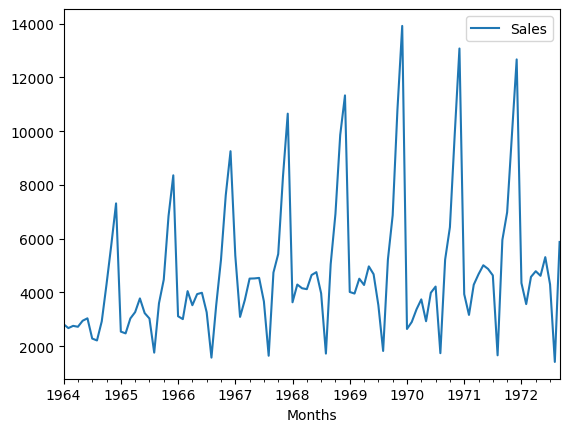

In [10]:
# visualize the data
df.plot()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['Sales'])

In [13]:
def adfuller_test(sales):
  result=adfuller(sales)
  labels=['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
  for value, label in zip(result, labels):
    print(label+' : '+str(value))
  if result[1]<=0.05:
    print('Reject the null hypothesis')
  else:
    print('Fail to reject the null hypothesis')

In [14]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
Fail to reject the null hypothesis


In [15]:
# differencing
df['Sales First Difference']=df['Sales']-df['Sales'].shift(1)
df.head()

,Sales,Sales First Difference
Months,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [16]:
df['Sales First Difference']=df['Sales']-df['Sales'].shift(12)
df.head(14)

,Sales,Sales First Difference
Months,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
1964-06-01,3036.0,NaN
1964-07-01,2282.0,NaN
1964-08-01,2212.0,NaN
1964-09-01,2922.0,NaN


In [17]:
adfuller_test(df['Sales First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
Reject the null hypothesis


<Axes: xlabel='Months'>

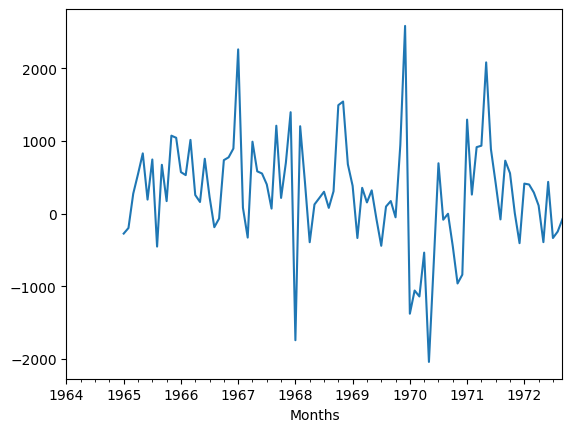

In [18]:
df['Sales First Difference'].plot()

## **auto regresive model**

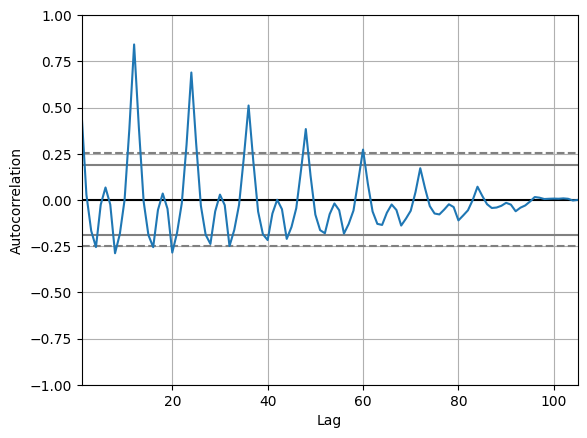

In [19]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

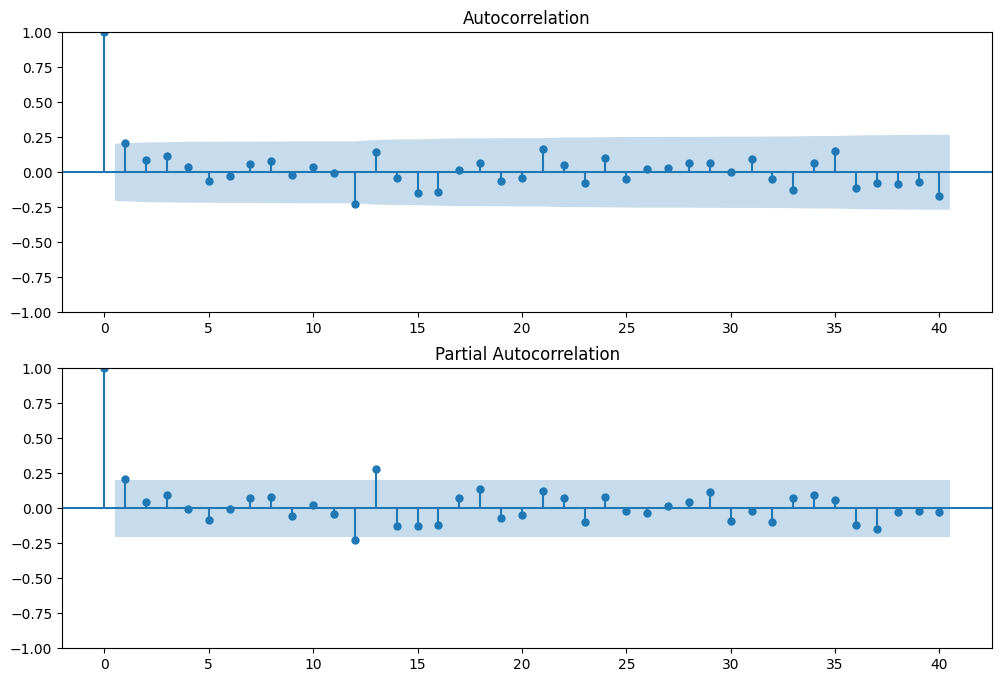

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Sales First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Sales First Difference'].iloc[13:],lags=40,ax=ax2)

In [21]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [22]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

In [23]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Mon, 30 Dec 2024   AIC                           1911.627
Time:                        21:06:16   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Months'>

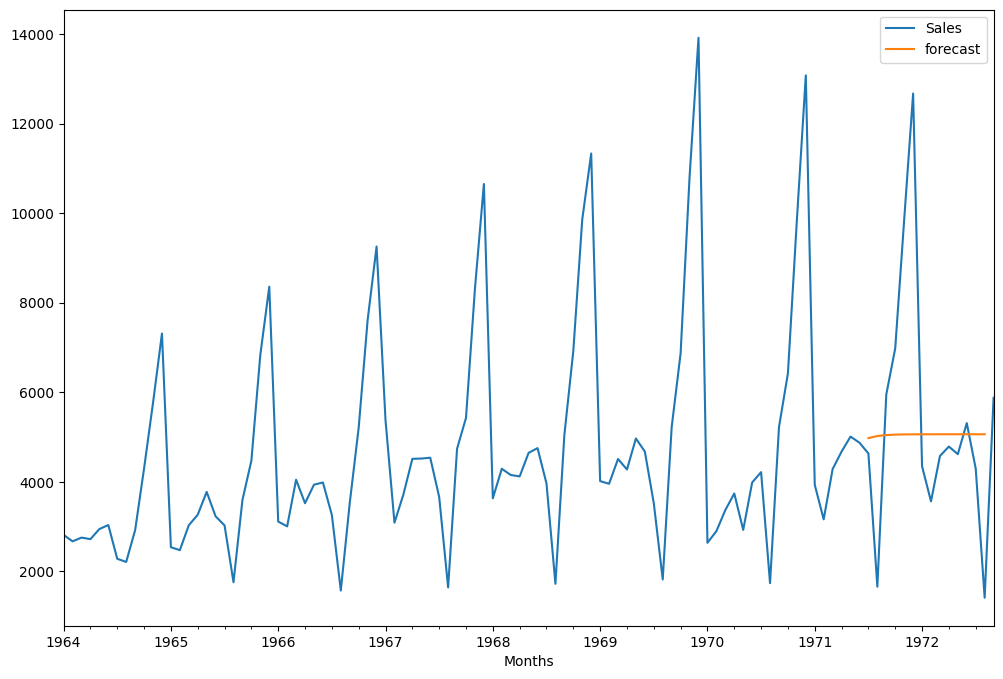

In [24]:

df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [25]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

<Axes: xlabel='Months'>

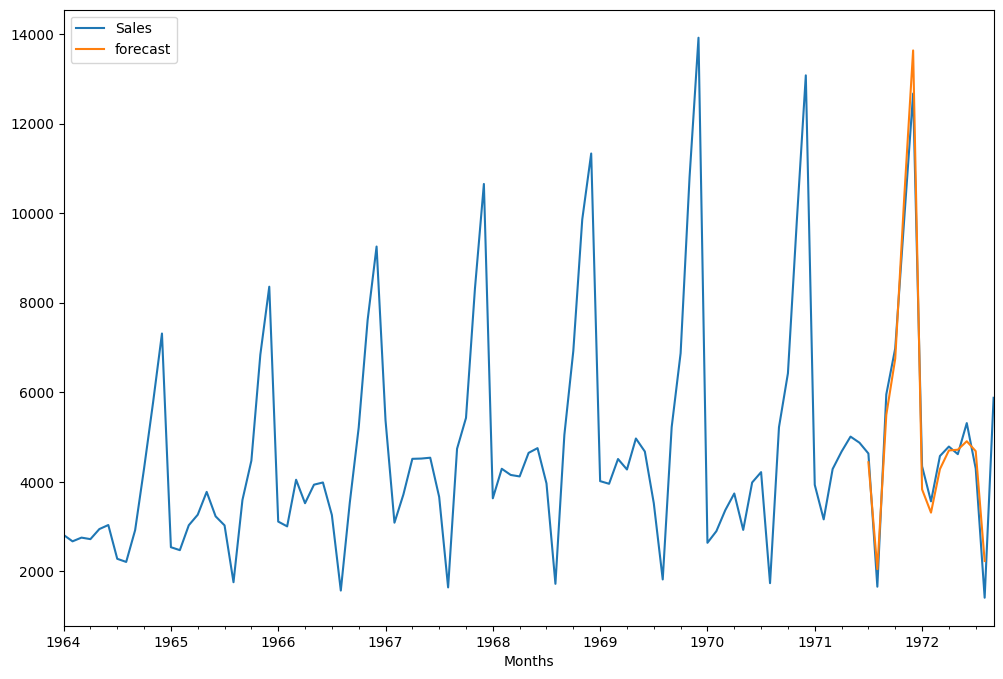

In [26]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [27]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,48)]

In [28]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [29]:
future_datest_df.tail()

,Sales,Sales First Difference,forecast
1976-04-01,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN


In [30]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

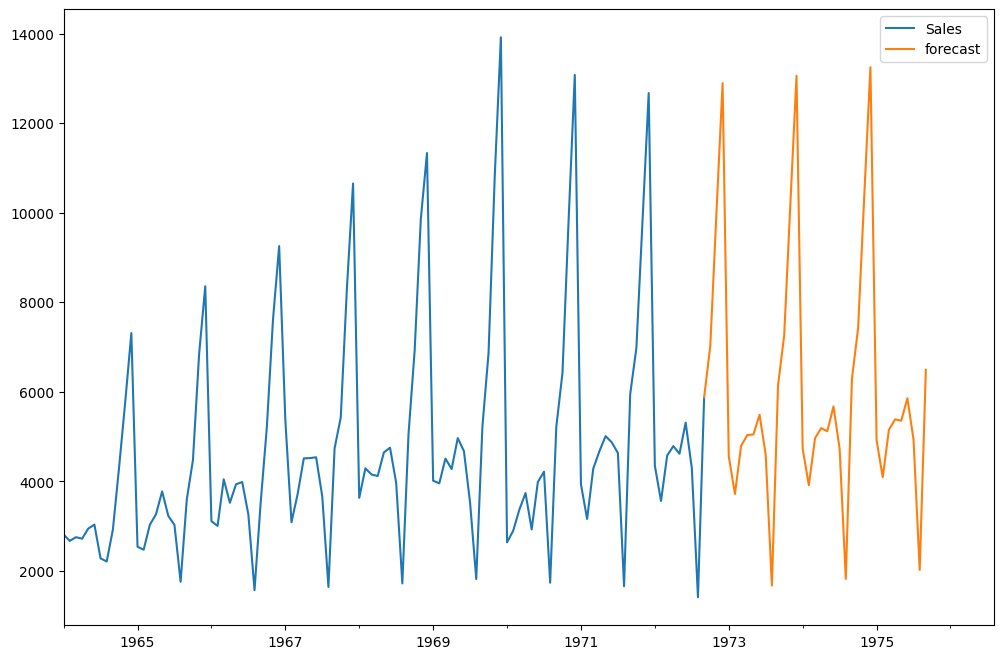

In [31]:
future_df['forecast'] = results.predict(start = 104, end = 140, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [32]:
df

,Sales,Sales First Difference,forecast
Months,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,NaN
1964-03-01,2755.0,NaN,NaN
1964-04-01,2721.0,NaN,NaN
1964-05-01,2946.0,NaN,NaN
...,...,...,...
1972-05-01,4618.0,-392.0,4717.510672
1972-06-01,5312.0,438.0,4906.403885
1972-07-01,4298.0,-335.0,4685.436279


In [33]:
df=df.drop(['Sales First Difference','forecast'],axis=1)
# df = df.reset_index()
# df = df.drop(['level_0','index'],axis=1)
# df =df.drop(['transformed'],axis=1)
# df['Months']=pd.to_datetime(df['Months'])
# df=df.drop(['Date'],axis=1)
# df

In [34]:
df

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [35]:
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')

In [36]:
df

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [37]:
df = df.reset_index()
df

,Months,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0
...,...,...
100,1972-05-01,4618.0
101,1972-06-01,5312.0
102,1972-07-01,4298.0
103,1972-08-01,1413.0


In [38]:
df['Months'] = pd.to_datetime(df['Months']).dt.strftime('%Y-%m-%d')

In [39]:
df_subset = df.iloc[80:103]
df_subset

,Months,Sales
80,1970-09-01,5221.0
81,1970-10-01,6424.0
82,1970-11-01,9842.0
83,1970-12-01,13076.0
84,1971-01-01,3934.0
85,1971-02-01,3162.0
86,1971-03-01,4286.0
87,1971-04-01,4676.0
88,1971-05-01,5010.0
89,1971-06-01,4874.0


ADF Statistic: -1.8335930563276215
p-value: 0.36391577166024586
SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC: 500.8269578243682
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC: 422.2658122196696
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC: -220.57236871262808
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC: -218.59745022420444
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC: -147.41247731079702
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC: -92.10287141551045
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC: -218.6062053601453
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC: -217.26046848942178
SARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC: 392.7247927968665
SARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC: 312.8945276703901
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC: -221.97573103798126
SARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC: -220.720550292417
SARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC: -153.82988093296825
SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC: -90.79513923610305
SARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC: -221.0079096377131
SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC: -220.00879224074166
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC: -

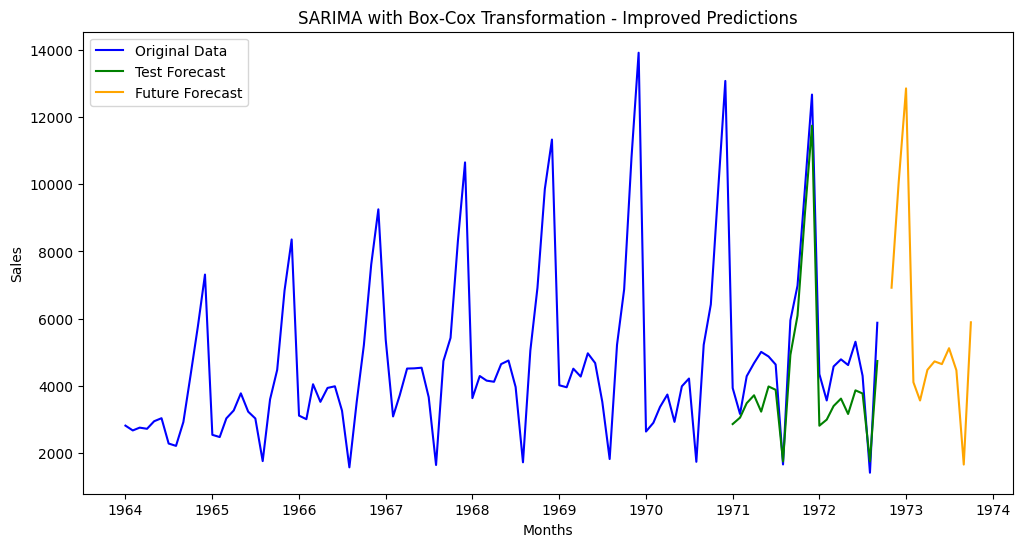

In [40]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from itertools import product
import statsmodels.api as sm

# Ensure data is stationary
result = adfuller(df['Sales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Apply Box-Cox Transformation
values = df['Sales']
transformed_values, lambda_boxcox = boxcox(values)
df['transformed'] = transformed_values

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Ensure 'Months' column is in datetime format
df['Months'] = pd.to_datetime(df['Months'])
test['Months'] = pd.to_datetime(test['Months'])

# Parameter Tuning for SARIMA
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
seasonal_period = [12]

pdq = list(product(p, d, q))
seasonal_pdq = list(product(P, D, Q, seasonal_period))

best_aic = float('inf')
best_order = None
best_seasonal_order = None

for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train['transformed'], order=order, seasonal_order=seasonal_order)
            results = model.fit(disp=False)
            print(f"SARIMA{order}x{seasonal_order} - AIC: {results.aic}")
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = order
                best_seasonal_order = seasonal_order
        except:
            continue

print(f"Best SARIMA order: {best_order}, Seasonal order: {best_seasonal_order}")

# Fit SARIMA model with best parameters
sarima_model = SARIMAX(train['transformed'], order=best_order, seasonal_order=best_seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Forecasting
forecast = sarima_fit.forecast(steps=len(test))

# Inverse Box-Cox Transformation
forecast_inverted = np.exp(np.log(lambda_boxcox * forecast + 1) / lambda_boxcox)
forecast_inverted = pd.Series(forecast_inverted).fillna(method="ffill").fillna(method="bfill")

# Evaluate predictions
mse = mean_squared_error(test['Sales'], forecast_inverted)
print(f"Mean Squared Error: {mse}")

# Fit SARIMA on the full dataset for future predictions
sarima_model_full = SARIMAX(df['transformed'], order=best_order, seasonal_order=best_seasonal_order)
sarima_fit_full = sarima_model_full.fit(disp=False)

# Predict future values
future_steps = 12
future_forecast = sarima_fit_full.forecast(steps=future_steps)

# Inverse Box-Cox Transformation for future predictions
future_forecast_inverted = np.exp(np.log(lambda_boxcox * future_forecast + 1) / lambda_boxcox)

# Prepare future dates
future_dates = pd.date_range(start=df['Months'].iloc[-1], periods=future_steps + 1, freq='M')[1:]
future_df = pd.DataFrame({'Months': future_dates, 'Forecast': future_forecast_inverted})
future_df.set_index('Months', inplace=True)
test.set_index('Months', inplace=True)

# Visualize results

plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['Months']), df['Sales'], label="Original Data", color="blue")
plt.plot(test.index, forecast_inverted, label="Test Forecast", color="green")
plt.plot(future_df.index, future_df['Forecast'], label="Future Forecast", color="orange")
plt.title("SARIMA with Box-Cox Transformation - Improved Predictions")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [41]:
df

,Months,Sales,transformed
0,1964-01-01,2815.0,4.603833
1,1964-02-01,2672.0,4.588250
2,1964-03-01,2755.0,4.597408
3,1964-04-01,2721.0,4.593696
4,1964-05-01,2946.0,4.617329
...,...,...,...
100,1972-05-01,4618.0,4.745778
101,1972-06-01,5312.0,4.784020
102,1972-07-01,4298.0,4.725844
103,1972-08-01,1413.0,4.387455


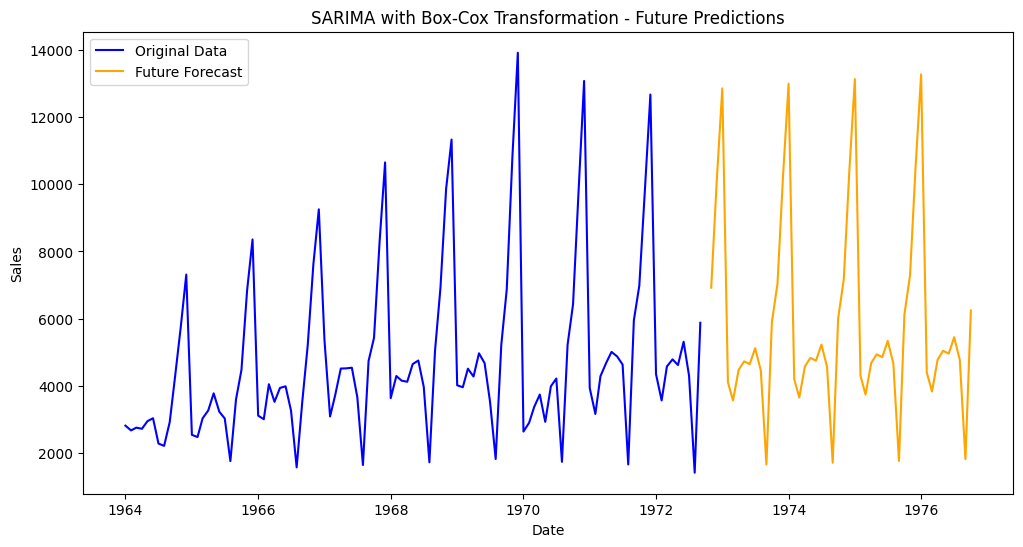

In [42]:
# Fit SARIMA model on the full dataset
sarima_model = SARIMAX(df['transformed'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 12))
sarima_fit = sarima_model.fit(disp=False)

# Predict future values (e.g., next 48 months)
future_steps = 48
future_forecast = sarima_fit.forecast(steps=future_steps)

# Inverse Box-Cox Transformation for future predictions
future_forecast_inverted = np.exp(np.log(lambda_boxcox * future_forecast + 1) / lambda_boxcox)

# Create future dates
# Ensure the 'Months' column in df is a datetime type
df['Months'] = pd.to_datetime(df['Months'])
last_date = df['Months'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

# Combine future dates with predictions
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast_inverted})
future_df.set_index('Date', inplace=True)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['Months']), df['Sales'], label="Original Data", color="blue")
plt.plot(future_df.index, future_df['Forecast'], label="Future Forecast", color="orange")
plt.title("SARIMA with Box-Cox Transformation - Future Predictions")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Save future predictions to a CSV file
future_df.to_csv("future_predictions-aic.csv")


ADF Statistic: -1.8335930563276215
p-value: 0.36391577166024586
SARIMA(0, 0, 0)x(0, 0, 0, 12) - BIC: 503.2577746232115
SARIMA(0, 0, 0)x(0, 0, 1, 12) - BIC: 427.12744581735626
SARIMA(0, 0, 0)x(0, 1, 0, 12) - BIC: -218.29570259361202
SARIMA(0, 0, 0)x(0, 1, 1, 12) - BIC: -214.04411798617232
SARIMA(0, 0, 0)x(1, 0, 0, 12) - BIC: -142.5508437131104
SARIMA(0, 0, 0)x(1, 0, 1, 12) - BIC: -84.8104210189805
SARIMA(0, 0, 0)x(1, 1, 0, 12) - BIC: -214.0528731221132
SARIMA(0, 0, 0)x(1, 1, 1, 12) - BIC: -210.4304701323736
SARIMA(0, 0, 1)x(0, 0, 0, 12) - BIC: 397.58642639455314
SARIMA(0, 0, 1)x(0, 0, 1, 12) - BIC: 320.18697806692006
SARIMA(0, 0, 1)x(0, 1, 0, 12) - BIC: -217.42239879994915
SARIMA(0, 0, 1)x(0, 1, 1, 12) - BIC: -213.89055193536882
SARIMA(0, 0, 1)x(1, 0, 0, 12) - BIC: -146.5374305364383
SARIMA(0, 0, 1)x(1, 0, 1, 12) - BIC: -81.0718720407298
SARIMA(0, 0, 1)x(1, 1, 0, 12) - BIC: -214.17791128066494
SARIMA(0, 0, 1)x(1, 1, 1, 12) - BIC: -210.90212776467743
SARIMA(0, 1, 0)x(0, 0, 0, 12) - BIC: 

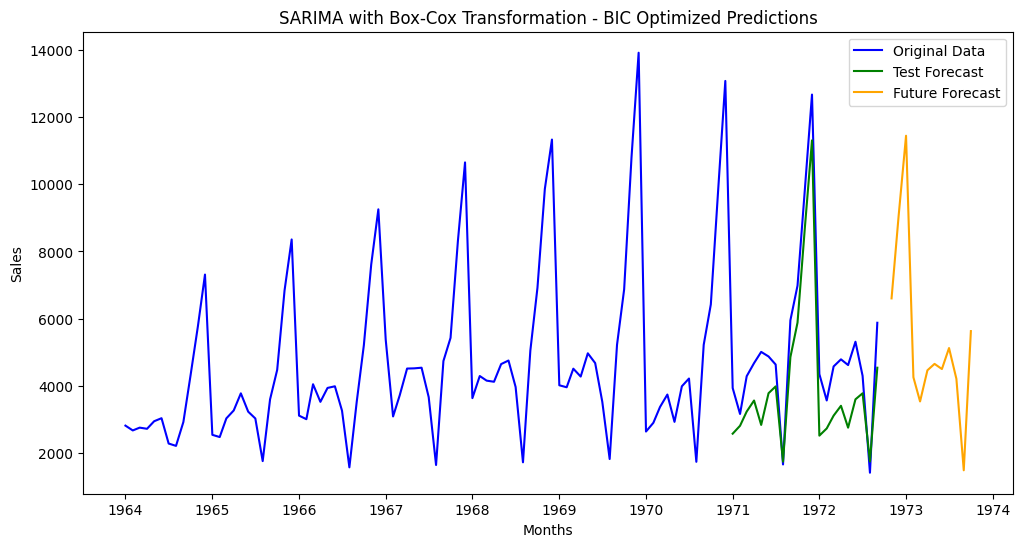

In [43]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from itertools import product
import statsmodels.api as sm

# Ensure data is stationary
result = adfuller(df['Sales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Apply Box-Cox Transformation
values = df['Sales']
transformed_values, lambda_boxcox = boxcox(values)
df['transformed'] = transformed_values

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Ensure 'Months' column is in datetime format
df['Months'] = pd.to_datetime(df['Months'])
test['Months'] = pd.to_datetime(test['Months'])

# Parameter Tuning for SARIMA
p = range(0, 2)
d = range(0, 2)
q = range(0, 2)
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
seasonal_period = [12]

pdq = list(product(p, d, q))
seasonal_pdq = list(product(P, D, Q, seasonal_period))

best_bic = float('inf')
best_order = None
best_seasonal_order = None

for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train['transformed'], order=order, seasonal_order=seasonal_order)
            results = model.fit(disp=False)
            print(f"SARIMA{order}x{seasonal_order} - BIC: {results.bic}")
            if results.bic < best_bic:
                best_bic = results.bic
                best_order = order
                best_seasonal_order = seasonal_order
        except:
            continue

print(f"Best SARIMA order: {best_order}, Seasonal order: {best_seasonal_order}")

# Fit SARIMA model with best parameters
sarima_model = SARIMAX(train['transformed'], order=best_order, seasonal_order=best_seasonal_order)
sarima_fit = sarima_model.fit(disp=False)

# Forecasting
forecast = sarima_fit.forecast(steps=len(test))

# Inverse Box-Cox Transformation
forecast_inverted = np.exp(np.log(lambda_boxcox * forecast + 1) / lambda_boxcox)
forecast_inverted = pd.Series(forecast_inverted).fillna(method="ffill").fillna(method="bfill")

# Evaluate predictions
mse = mean_squared_error(test['Sales'], forecast_inverted)
print(f"Mean Squared Error: {mse}")

# Fit SARIMA on the full dataset for future predictions
sarima_model_full = SARIMAX(df['transformed'], order=best_order, seasonal_order=best_seasonal_order)
sarima_fit_full = sarima_model_full.fit(disp=False)

# Predict future values
future_steps = 12
future_forecast = sarima_fit_full.forecast(steps=future_steps)

# Inverse Box-Cox Transformation for future predictions
future_forecast_inverted = np.exp(np.log(lambda_boxcox * future_forecast + 1) / lambda_boxcox)

# Prepare future dates
future_dates = pd.date_range(start=df['Months'].iloc[-1], periods=future_steps + 1, freq='M')[1:]
future_df = pd.DataFrame({'Months': future_dates, 'Forecast': future_forecast_inverted})
future_df.set_index('Months', inplace=True)
test.set_index('Months', inplace=True)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['Months']), df['Sales'], label="Original Data", color="blue")
plt.plot(test.index, forecast_inverted, label="Test Forecast", color="green")
plt.plot(future_df.index, future_df['Forecast'], label="Future Forecast", color="orange")
plt.title("SARIMA with Box-Cox Transformation - BIC Optimized Predictions")
plt.xlabel("Months")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [44]:
# SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC: -240.3535805207677
# SARIMA(0, 1, 1)x(1, 0, 0, 12) - BIC: -232.30466809059104

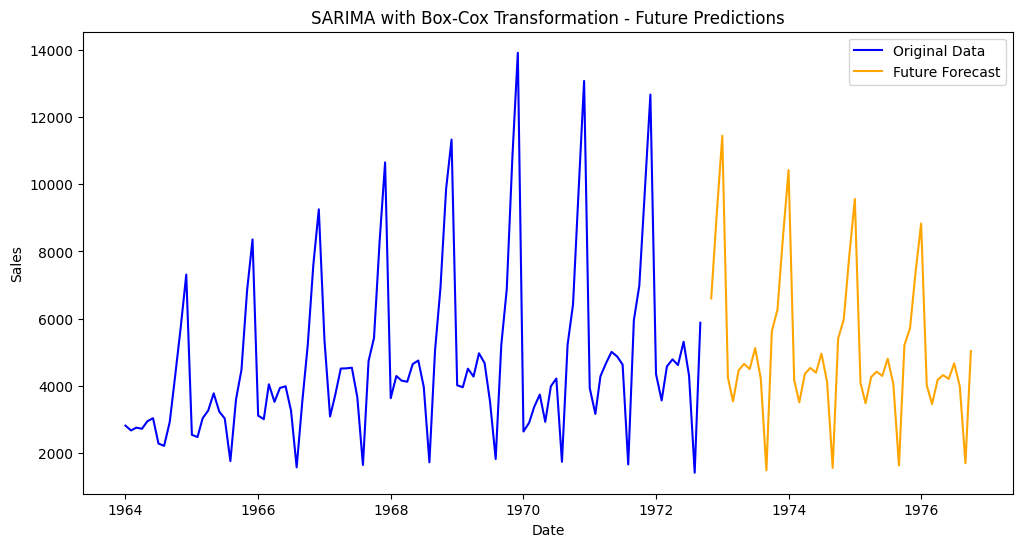

In [45]:
# Fit SARIMA model on the full dataset
# BIC
sarima_model = SARIMAX(df['transformed'], order=(0, 1, 1), seasonal_order=(1, 0, 0, 12))
sarima_fit = sarima_model.fit(disp=False)

# Predict future values (e.g., next 48 months)
future_steps = 48
future_forecast = sarima_fit.forecast(steps=future_steps)

# Inverse Box-Cox Transformation for future predictions
future_forecast_inverted = np.exp(np.log(lambda_boxcox * future_forecast + 1) / lambda_boxcox)

# Create future dates
# Ensure the 'Months' column in df is a datetime type
df['Months'] = pd.to_datetime(df['Months'])
last_date = df['Months'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=future_steps + 1, freq='M')[1:]

# Combine future dates with predictions
future_df = pd.DataFrame({'Date': future_dates, 'Forecast': future_forecast_inverted})
future_df.set_index('Date', inplace=True)

# Visualize results
plt.figure(figsize=(12, 6))
plt.plot(pd.to_datetime(df['Months']), df['Sales'], label="Original Data", color="blue")
plt.plot(future_df.index, future_df['Forecast'], label="Future Forecast", color="orange")
plt.title("SARIMA with Box-Cox Transformation - Future Predictions")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Save future predictions to a CSV file
future_df.to_csv("future_predictions-bic.csv")
